<a href="https://colab.research.google.com/github/marwantosolve/Deep-Learning-Hyperparameter-Exploration-MNIST/blob/main/Hyperparameter_Exploration_MNIST_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep-Learning-Hyperparameter-Exploration-on-MNIST-Dataset-Project

## Step 1: Setup & Baseline Models

- Load MNIST dataset (shape 28x28)
- Shuffle dataset
- Implement basic ANN
- Implement SVM
- Document accuracy, layers, params, train/test time for both

### load the dataset

In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np
import time
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [2]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### basic exploratory insights about the data

In [3]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)


x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


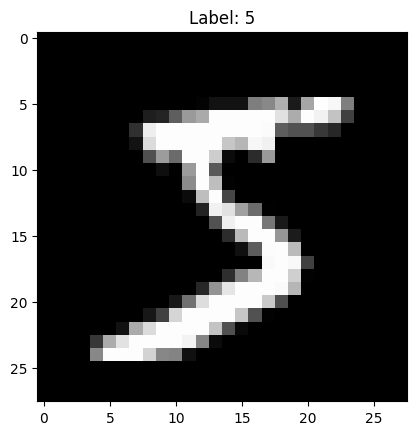

In [4]:
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()


In [5]:
print("Data type:", x_train.dtype)
print("Pixel range: min =", x_train.min(), ", max =", x_train.max())


Data type: uint8
Pixel range: min = 0 , max = 255


In [6]:
import numpy as np
unique, counts = np.unique(y_train, return_counts=True)
print("Label distribution in training set:")
for label, count in zip(unique, counts):
    print(f"Digit {label}: {count} samples")


Label distribution in training set:
Digit 0: 5923 samples
Digit 1: 6742 samples
Digit 2: 5958 samples
Digit 3: 6131 samples
Digit 4: 5842 samples
Digit 5: 5421 samples
Digit 6: 5918 samples
Digit 7: 6265 samples
Digit 8: 5851 samples
Digit 9: 5949 samples


### ANN

In [7]:
# Preprocess data for ANN

# Normalize pixel values to be between 0 and 1
x_train_ann = x_train.astype('float32') / 255.0
x_test_ann = x_test.astype('float32') / 255.0

# One-hot encode the labels
y_train_ann = to_categorical(y_train, num_classes=10)
y_test_ann = to_categorical(y_test, num_classes=10)

"""
NOte Important Fsh5:
Shuffle dataset (Keras does this by default during training if shuffle=True)
For SVM, we'll use the original shapes and shuffle manually if needed,
but scikit-learn's train_test_split or model's shuffle usually handles this.
For simplicity here, we'll use the already split data
"""

print("--- Step 1: A) Basic ANN ---")
# Implement basic ANN
ann_model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images
    Dense(128, activation='relu'),   # A hidden layer with 128 neurons
    # Output layer with 10 neurons for 10 classes
    Dense(10, activation='softmax') #softmax beacuse it is multiclass

])

ann_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

ann_model.summary()

# Train ANN
start_time_ann_train = time.time()
history_ann = ann_model.fit(
    x_train_ann, y_train_ann, epochs=5, batch_size=16, verbose=1, validation_split=0.1)

end_time_ann_train = time.time()
ann_train_time = end_time_ann_train - start_time_ann_train


# Evaluate ANN
start_time_ann_test = time.time()

loss_ann, accuracy_ann = ann_model.evaluate(x_test_ann, y_test_ann, verbose=0)

end_time_ann_test = time.time()
ann_test_time = end_time_ann_test - start_time_ann_test

print(f"ANN - Accuracy: {accuracy_ann*100:.2f}%")
print(f"ANN - Layers: {len(ann_model.layers)}")
print(f"ANN - Parameters: {ann_model.count_params()}")
print(f"ANN - Training Time: {ann_train_time:.2f} seconds")
print(f"ANN - Test Time: {ann_test_time:.2f} seconds")

--- Step 1: A) Basic ANN ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.8883 - loss: 0.3948 - val_accuracy: 0.9675 - val_loss: 0.1122
Epoch 2/5
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.9658 - loss: 0.1111 - val_accuracy: 0.9717 - val_loss: 0.0974
Epoch 3/5
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9784 - loss: 0.0724 - val_accuracy: 0.9757 - val_loss: 0.0812
Epoch 4/5
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9851 - loss: 0.0496 - val_accuracy: 0.9773 - val_loss: 0.0834
Epoch 5/5
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9879 - loss: 0.0380 - val_accuracy: 0.9717 - val_loss: 0.1064
ANN - Accuracy: 97.14%
ANN - Layers: 3
ANN - Parameters: 101770
ANN - Training Time: 59.49 seconds
ANN - Test Time: 1.24 seconds


### SVM

In [8]:
# Preprocess data for SVM

# Flatten images
x_train_svm = x_train.reshape(x_train.shape[0], -1).astype('float32') / 255.0
x_test_svm = x_test.reshape(x_test.shape[0], -1).astype('float32') / 255.0
# For SVM, we use original y_train, y_test (not one-hot encoded)

# Due to SVM's computational complexity, let's use a subset of data for faster training
subset_size = 10000  # Using 10k samples for training, 2k for testing
x_train_svm_subset = x_train_svm[:subset_size]
y_train_svm_subset = y_train[:subset_size]
x_test_svm_subset = x_test_svm[:subset_size // 5]
y_test_svm_subset = y_test[:subset_size // 5]

print("\n--- Step 1: B) SVM ---")
# Implement SVM
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale',
                random_state=42)  # Common defaults

# Train SVM
start_time_svm_train = time.time()
svm_model.fit(x_train_svm_subset, y_train_svm_subset)
end_time_svm_train = time.time()
svm_train_time = end_time_svm_train - start_time_svm_train

# Evaluate SVM
start_time_svm_test = time.time()
y_pred_svm = svm_model.predict(x_test_svm_subset)
accuracy_svm = accuracy_score(y_test_svm_subset, y_pred_svm)
end_time_svm_test = time.time()
svm_test_time = end_time_svm_test - start_time_svm_test

print(f"SVM - Accuracy (on subset): {accuracy_svm*100:.2f}%")
# SVM layers are not typically counted like NNs. We can note the kernel and type.
print(f"SVM - Model Type: SVC with RBF kernel")
# SVM parameters are not directly comparable to NN params in the same way.
# n_support_ is the number of support vectors.
print(f"SVM - Number of support vectors: {np.sum(svm_model.n_support_)}")
print(f"SVM - Training Time (on subset): {svm_train_time:.2f} seconds")
print(f"SVM - Test Time (on subset): {svm_test_time:.2f} seconds")


--- Step 1: B) SVM ---
SVM - Accuracy (on subset): 94.45%
SVM - Model Type: SVC with RBF kernel
SVM - Number of support vectors: 3744
SVM - Training Time (on subset): 8.39 seconds
SVM - Test Time (on subset): 5.15 seconds


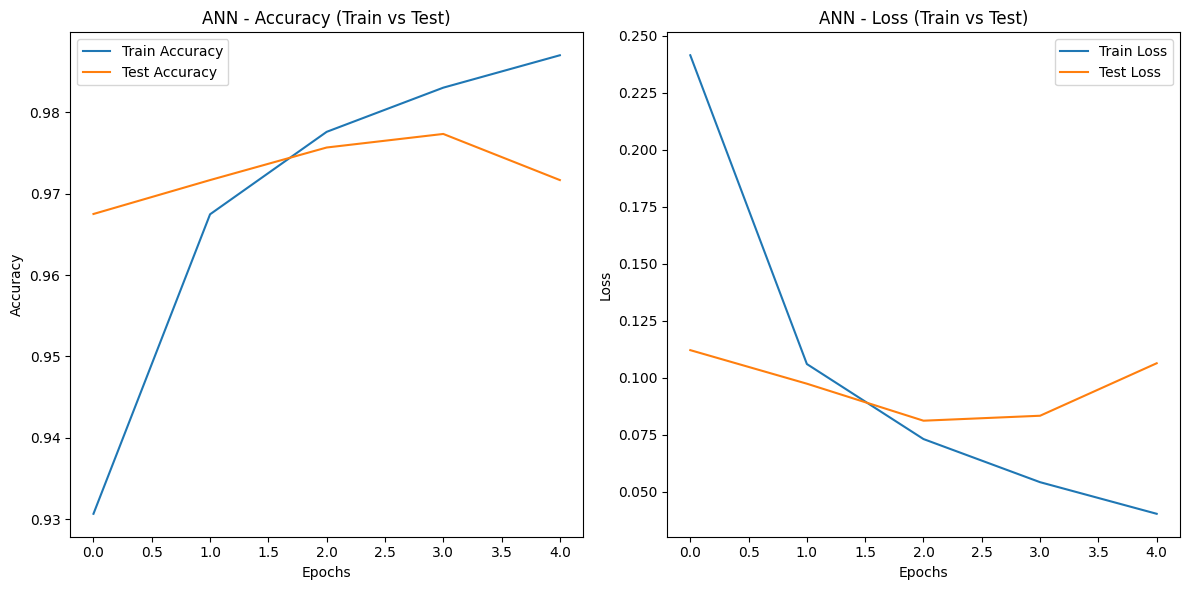

In [9]:
import matplotlib.pyplot as plt

# Visualization for ANN
plt.figure(figsize=(12, 6))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_ann.history['accuracy'], label='Train Accuracy')
plt.plot(history_ann.history['val_accuracy'], label='Test Accuracy')  # validation accuracy
plt.title('ANN - Accuracy (Train vs Test)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history_ann.history['loss'], label='Train Loss')
plt.plot(history_ann.history['val_loss'], label='Test Loss')  # validation loss
plt.title('ANN - Loss (Train vs Test)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()




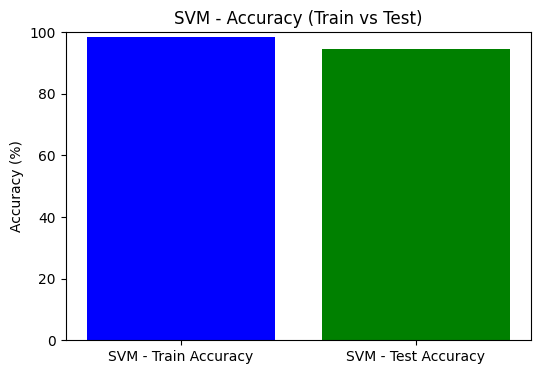

In [10]:
y_train_pred_svm = svm_model.predict(x_train_svm_subset)
train_accuracy_svm = accuracy_score(y_train_svm_subset, y_train_pred_svm)

# Plotting SVM accuracies
plt.figure(figsize=(6, 4))
accuracies = [train_accuracy_svm * 100, accuracy_svm * 100]
labels = ['SVM - Train Accuracy', 'SVM - Test Accuracy']

plt.bar(labels, accuracies, color=['blue', 'green'])
plt.title('SVM - Accuracy (Train vs Test)')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
plt.show()

## Step 2: Base CNN + Epoch Tuning
- Implement CNN with 3 layers (include Conv2D + MaxPooling2D)
- Use ReLU, SGD, no dropout
- Test different epoch values (10–25)
- Log results: accuracy, params, time, layers
- Choose best epoch count

In [17]:
# Preprocess data for CNN (needs channel dimension)
x_train_cnn = x_train_ann.reshape(x_train_ann.shape[0], 28, 28, 1)
x_test_cnn = x_test_ann.reshape(x_test_ann.shape[0], 28, 28, 1)

print("\n--- Step 2: A) Base CNN ---")

# 3 Conv + 2 MaxPooling
def create_base_cnn_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),

        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),

        Conv2D(64, (3, 3), activation='relu'),
        Flatten(),
        Dense(10, activation='softmax')
    ])
    # Using SGD as specified
    optimizer = SGD(learning_rate=0.01, momentum=0.9)  # A common default LR for SGD
    model.compile(optimizer=optimizer,
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
    return model  # Added missing return statement
print ("Done")


--- Step 2: A) Base CNN ---
Done


In [18]:
print("\n--- Step 2: B) + Epoch Tuning ---")

epoch_options = [10, 15, 20, 25]
best_epoch_cnn = -1
best_accuracy_cnn = 0
best_history_cnn = None
results_cnn_epoch_tuning = []

print("\nTesting different epoch values for Base CNN:")
for epochs in epoch_options:
    print(f"\nTraining Base CNN with {epochs} epochs...")
    cnn_model = create_base_cnn_model()
    if epochs == epoch_options[0]:  # Print summary only once
        print("\nCNN Model Summary:")
        cnn_model.summary()  # Ensure summary is printed

    start_time_cnn_train = time.time()
    history = cnn_model.fit(
        x_train_cnn, y_train_ann,
        epochs=epochs,
        batch_size=32,
        verbose=1,
        validation_data=(x_test_cnn, y_test_ann)  # Evaluate on test set for simplicity here
    )
    end_time_cnn_train = time.time()
    cnn_train_time = end_time_cnn_train - start_time_cnn_train

    start_time_cnn_test = time.time()
    loss_cnn, accuracy_cnn = cnn_model.evaluate(x_test_cnn, y_test_ann, verbose=0)
    end_time_cnn_test = time.time()
    cnn_test_time = end_time_cnn_test - start_time_cnn_test

    print(f"CNN ({epochs} epochs) - Test Accuracy: {accuracy_cnn*100:.2f}%")
    print(f"CNN ({epochs} epochs) - Layers: {len(cnn_model.layers)}")
    print(f"CNN ({epochs} epochs) - Parameters: {cnn_model.count_params()}")
    print(f"CNN ({epochs} epochs) - Training Time: {cnn_train_time:.2f} seconds")
    print(f"CNN ({epochs} epochs) - Test Time: {cnn_test_time:.2f} seconds")

    results_cnn_epoch_tuning.append({
        'epochs': epochs,
        'accuracy': accuracy_cnn,
        'params': cnn_model.count_params(),
        'layers': len(cnn_model.layers),
        'train_time': cnn_train_time,
        'test_time': cnn_test_time
    })

    if accuracy_cnn > best_accuracy_cnn:
        best_accuracy_cnn = accuracy_cnn
        best_epoch_cnn = epochs
        best_history_cnn = history  # Store training history

print(f"\nBest epoch count for Base CNN: {best_epoch_cnn} with accuracy: {best_accuracy_cnn*100:.2f}%")


--- Step 2: B) + Epoch Tuning ---

Testing different epoch values for Base CNN:

Training Base CNN with 10 epochs...

CNN Model Summary:


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         5,770 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,514 (240.29 KB)

 Trainable params: 61,514 (240.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8560 - loss: 0.4552 - val_accuracy: 0.9722 - val_loss: 0.0880
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9815 - loss: 0.0607 - val_accuracy: 0.9903 - val_loss: 0.0325
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9889 - loss: 0.0348 - val_accuracy: 0.9891 - val_loss: 0.0313
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9909 - loss: 0.0290 - val_accuracy: 0.9921 - val_loss: 0.0254
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9924 - loss: 0.0242 - val_accuracy: 0.9910 - val_loss: 0.0297
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9942 - loss: 0.0189 - val_accuracy: 0.9919 - val_loss: 0.0262
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9950 - loss: 0.0157 - val_accuracy: 0.9896 - val_loss: 0.0323
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9962 - loss: 0.01

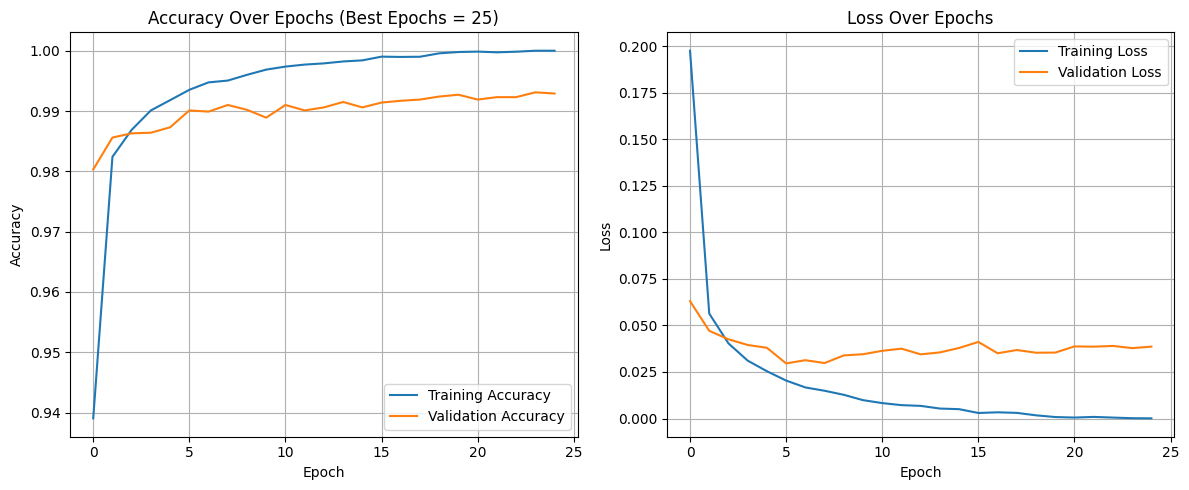

In [19]:
# Accuracy plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(best_history_cnn.history['accuracy'], label='Training Accuracy')
plt.plot(best_history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title(f"Accuracy Over Epochs (Best Epochs = {best_epoch_cnn})")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(best_history_cnn.history['loss'], label='Training Loss')
plt.plot(best_history_cnn.history['val_loss'], label='Validation Loss')
plt.title("Loss Over Epochs")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


## Step 3: Learning Rate Testing
- Fix best epoch from Step 2
- Test learning rates (e.g., 0.01, 0.001, 0.0001)
- Document impact on performance
- Select optimal LR

In [ ]:
print("\n--- Step 3: Learning Rate Testing ---")

# Use the best_epoch_cnn from Step 2
fixed_epochs_for_lr_testing = best_epoch_cnn
print(f"Using fixed epoch count: {fixed_epochs_for_lr_testing}")

learning_rate_options = [0.01, 0.001, 0.0001]  # As suggested
best_lr_cnn = -1
best_accuracy_lr_cnn = 0
results_cnn_lr_tuning = []


def create_cnn_model_for_lr_testing(learning_rate):
  model = Sequential([
      Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
      MaxPooling2D((2, 2)),
      Conv2D(64, (3, 3), activation='relu'),
      MaxPooling2D((2, 2)),
      Conv2D(64, (3, 3), activation='relu'),
      Flatten(),
      Dense(10, activation='softmax')
  ])
  optimizer = SGD(learning_rate=learning_rate)
  model.compile(optimizer=optimizer,
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model


print("\nTesting different learning rates for Base CNN:")
for lr in learning_rate_options:
  print(
      f"\nTraining Base CNN with LR={lr} for {fixed_epochs_for_lr_testing} epochs...")
  cnn_lr_model = create_cnn_model_for_lr_testing(learning_rate=lr)
  # No need to print summary repeatedly, structure is same as base CNN

  start_time_cnn_lr_train = time.time()
  history_lr = cnn_lr_model.fit(x_train_cnn, y_train_ann,
                                epochs=fixed_epochs_for_lr_testing,
                                batch_size=32,
                                verbose=1,
                                validation_data=(x_test_cnn, y_test_ann)
                                )
  end_time_cnn_lr_train = time.time()
  cnn_lr_train_time = end_time_cnn_lr_train - start_time_cnn_lr_train

  loss_cnn_lr, accuracy_cnn_lr = cnn_lr_model.evaluate(
      x_test_cnn, y_test_ann, verbose=0)

  print(f"CNN (LR={lr}) - Test Accuracy: {accuracy_cnn_lr*100:.2f}%")
  print(f"CNN (LR={lr}) - Training Time: {cnn_lr_train_time:.2f} seconds")

  results_cnn_lr_tuning.append({
      'learning_rate': lr,
      'accuracy': accuracy_cnn_lr,
      'train_time': cnn_lr_train_time,
      # Params and layers are same as base CNN, so not logged again unless model changes
  })

  if accuracy_cnn_lr > best_accuracy_lr_cnn:
    best_accuracy_lr_cnn = accuracy_cnn_lr
    best_lr_cnn = lr

print(
    f"\nBest learning rate for Base CNN: {best_lr_cnn} with accuracy: {best_accuracy_lr_cnn*100:.2f}%")


--- Step 3: Learning Rate Testing ---
Using fixed epoch count: 25

Testing different learning rates for Base CNN:

Training Base CNN with LR=0.01 for 25 epochs...
Epoch 1/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6431 - loss: 1.1216 - val_accuracy: 0.9493 - val_loss: 0.1646
Epoch 2/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9515 - loss: 0.1615 - val_accuracy: 0.9643 - val_loss: 0.1209
Epoch 3/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9669 - loss: 0.1074 - val_accuracy: 0.9750 - val_loss: 0.0742
Epoch 4/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9754 - loss: 0.0820 - val_accuracy: 0.9807 - val_loss: 0.0588
Epoch 5/25


In [ ]:
learning_rates = [res['learning_rate'] for res in results_cnn_lr_tuning]
accuracies = [res['accuracy'] for res in results_cnn_lr_tuning]

plt.figure(figsize=(8, 5))
plt.plot(learning_rates, accuracies, marker='o')
plt.xscale('log')
plt.xlabel("Learning Rate (log scale)")
plt.ylabel("Test Accuracy")
plt.title("Learning Rate vs Test Accuracy")
plt.grid(True)
plt.show()


## Step 4: Model Architecture Variation
- Test models with different Conv/FC layers (3 Conv max, 4 FC max)
- Aim for high accuracy with fewer params
- Document 4+ different configs
- Capture full Segment B data

In [ ]:
print("\n--- Step 4: Model Architecture Variation ---")

# Use best settings from Step 2 and 3
fixed_epochs_arch = best_epoch_cnn
fixed_lr_arch = best_lr_cnn
print(f"Using fixed epochs: {fixed_epochs_arch}, fixed LR: {fixed_lr_arch}")

# Store results for architecture variations
arch_variation_results = []


def create_variable_cnn_model(conv_layers_config, fc_layers_config, learning_rate):
  """
  Creates a CNN model based on specified convolutional and fully connected layer configurations.
  conv_layers_config: list of tuples, e.g., [(filters, kernel_size), ...]
                      Kernel size should be (size, size)
  fc_layers_config: list of integers, e.g., [neurons_fc1, neurons_fc2, ...]
                      Each <= 512 as per constraints.
  """
  model = Sequential()
  model.add(Conv2D(conv_layers_config[0][0], conv_layers_config[0]
            [1], activation='relu', input_shape=(28, 28, 1)))
  model.add(MaxPooling2D((2, 2)))

  for i in range(1, len(conv_layers_config)):
    if i < 3:  # Max 3 Conv layers including the first one implies 2 more here
      model.add(
          Conv2D(conv_layers_config[i][0], conv_layers_config[i][1], activation='relu'))
      model.add(MaxPooling2D((2, 2)))
    else:
      # If more conv_layers are specified than allowed, we might add them without pooling or break
      # For now, sticking to max 3 conv blocks with pooling
      print(f"Warning: Exceeding 3 Conv layers with pooling. Additional Conv layers ignored in this setup.")
      break

  model.add(Flatten())

  for i in range(len(fc_layers_config)):
    if i < 4:  # Max 4 FC layers (excluding output layer, or including it?)
        # Assuming this constraint is for hidden FC layers.
      neurons = fc_layers_config[i]
      if neurons > 512:
        print(
            f"Warning: FC layer {i+1} with {neurons} neurons exceeds 512. Capping to 512.")
        neurons = 512
      model.add(Dense(neurons, activation='relu'))
    else:
      print(f"Warning: Exceeding 4 FC layers. Additional FC layers ignored.")
      break

  model.add(Dense(10, activation='softmax'))  # Output layer

  optimizer = SGD(learning_rate=learning_rate)
  model.compile(optimizer=optimizer,
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [ ]:
"""
Defining some architectures to test
Config format: (conv_layer_specs, fc_layer_specs)
conv_layer_spec: list of (filters, (kernel_x, kernel_y))
fc_layer_spec: list of (neuron_count)
"""

architectures_to_test = [
    # Config 1: Base model (3 Conv, 0 hidden FC - already tested, but good baseline here)
    {'name': '3Conv_0HiddenFC',
     'conv': [(32, (3, 3)), (64, (3, 3)), (64, (3, 3))],
     'fc': []},
    # Config 2: 2 Conv, 1 Hidden FC (128 neurons)
    {'name': '2Conv_1HiddenFC_128',
     'conv': [(32, (3, 3)), (64, (3, 3))],
     'fc': [128]},
    # Config 3: 3 Conv, 1 Hidden FC (64 neurons) - fewer params than base + FC
    {'name': '3Conv_1HiddenFC_64',
     'conv': [(32, (3, 3)), (64, (3, 3)), (64, (3, 3))],
     'fc': [64]},
    # Config 4: 2 Conv, 2 Hidden FC (128, 64 neurons)
    {'name': '2Conv_2HiddenFC_128_64',
     'conv': [(32, (5, 5)), (64, (5, 5))],  # Using 5x5 kernels here
     'fc': [128, 64]},
    # Config 5: 1 Conv, 1 Hidden FC (256 neurons) - fewer conv, more FC
    {'name': '1Conv_1HiddenFC_256',
     'conv': [(64, (5, 5))],
     'fc': [256]},
]

In [ ]:
print("\nTesting different CNN architectures:")
for i, arch_config in enumerate(architectures_to_test):
  print(f"\n--- Architecture {i+1}: {arch_config['name']} ---")

  # Ensure kernel sizes are valid tuples
  current_conv_config = []
  for filters, kernel_dim in arch_config['conv']:
    if isinstance(kernel_dim, int):
      kernel_tuple = (kernel_dim, kernel_dim)
    else:
      kernel_tuple = kernel_dim
    if kernel_tuple[0] > 5 or kernel_tuple[1] > 5:
      print(
          f"Warning: Kernel {kernel_tuple} for {arch_config['name']} exceeds 5x5. Skipping this config or capping kernel.")
      # For simplicity, we might skip or cap here. Capping:
      kernel_tuple = (min(kernel_tuple[0], 5), min(kernel_tuple[1], 5))
      print(f"Capped kernel to: {kernel_tuple}")
    current_conv_config.append((filters, kernel_tuple))

  arch_model = create_variable_cnn_model(current_conv_config,
                                         arch_config['fc'],
                                         learning_rate=fixed_lr_arch)
  arch_model.summary()

  start_time_arch_train = time.time()
  history_arch = arch_model.fit(x_train_cnn, y_train_ann,
                                epochs=fixed_epochs_arch,
                                batch_size=32,
                                verbose=1,
                                validation_data=(x_test_cnn, y_test_ann)
                                )
  end_time_arch_train = time.time()
  arch_train_time = end_time_arch_train - start_time_arch_train

  loss_arch, accuracy_arch = arch_model.evaluate(
      x_test_cnn, y_test_ann, verbose=0)

  print(
      f"Architecture {arch_config['name']} - Test Accuracy: {accuracy_arch*100:.2f}%")
  print(
      f"Architecture {arch_config['name']} - Parameters: {arch_model.count_params()}")
  print(
      f"Architecture {arch_config['name']} - Training Time: {arch_train_time:.2f} seconds")

  arch_variation_results.append({
      'name': arch_config['name'],
      'accuracy': accuracy_arch,
      'params': arch_model.count_params(),
      'conv_config': current_conv_config,
      'fc_config': arch_config['fc'],
      'train_time': arch_train_time,
      'layers': len(arch_model.layers)  # Number of functional layers
  })

In [ ]:
# Find the best architecture based on accuracy and params (e.g. accuracy/params ratio or a preferred metric)
# For now, just printing all results. User can analyze this list.
print("\n--- Architecture Variation Results ---")
for res in arch_variation_results:
  print(f"Name: {res['name']}, Accuracy: {res['accuracy']*100:.2f}%, Params: {res['params']}, Train Time: {res['train_time']:.2f}s")

  # Storing the best architecture found so far for next steps
# This simple selection prefers highest accuracy, then lowest params
best_overall_arch_config = None
best_overall_arch_accuracy = 0
best_overall_arch_params = float('inf')

for res in arch_variation_results:
  if res['accuracy'] > best_overall_arch_accuracy:
    best_overall_arch_accuracy = res['accuracy']
    best_overall_arch_params = res['params']
    best_overall_arch_config = res
  elif res['accuracy'] == best_overall_arch_accuracy:
    if res['params'] < best_overall_arch_params:
      best_overall_arch_params = res['params']
      best_overall_arch_config = res

if best_overall_arch_config:
  print(
      f"\nSelected best architecture for Step 5: {best_overall_arch_config['name']} with Acc: {best_overall_arch_config['accuracy']*100:.2f}%, Params: {best_overall_arch_config['params']}")
  # These will be used by step 5
  chosen_conv_config = best_overall_arch_config['conv_config']
  chosen_fc_config = best_overall_arch_config['fc_config']
else:
  print("\nNo architecture configurations were successfully tested or no results available.")
  # Fallback to base model config if none better or tested
  chosen_conv_config = [(32, (3, 3)), (64, (3, 3)), (64, (3, 3))]
  chosen_fc_config = []

In [ ]:
names = [res['name'] for res in arch_variation_results]
accuracies = [res['accuracy']*100 for res in arch_variation_results]
params = [res['params'] for res in arch_variation_results]

plt.figure(figsize=(10, 5))
plt.barh(names, accuracies)
plt.xlabel("Test Accuracy (%)")
plt.title("CNN Architecture Comparison - Accuracy")
plt.grid(True)
plt.show()


In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(params, accuracies)
plt.xlabel("Number of Parameters")
plt.ylabel("Test Accuracy (%)")
plt.title("Accuracy vs Parameters")
plt.grid(True)
plt.show()


## Step 5: Batch Sizes & Activations
- Try 2 new batch sizes (e.g., 128, 192)
- Test 3 new activations (include sigmoid)
- Compare performance metrics
- Finalize best batch size and activation

In [ ]:
print("\n--- Step 5: Batch Sizes & Activations ---")

# Use best settings from previous steps
# chosen_conv_config, chosen_fc_config, fixed_lr_arch, fixed_epochs_arch are available
print(
    f"Using best arch: Conv-{chosen_conv_config}, FC-{chosen_fc_config}, LR-{fixed_lr_arch}, Epochs-{fixed_epochs_arch}")

# Current (32) and two new ones, all <= 250
batch_size_options = [32, 128, 192]
best_batch_size = -1
best_accuracy_batch = 0
results_batch_tuning = []

# Modify create_variable_cnn_model to accept activation function
def create_cnn_model_for_step5(conv_layers_config, fc_layers_config, learning_rate, activation_func):
  model = Sequential()
  # First Conv Layer (with input_shape)
  model.add(Conv2D(conv_layers_config[0][0], conv_layers_config[0]
            [1], activation=activation_func, input_shape=(28, 28, 1)))
  model.add(MaxPooling2D((2, 2)))

  # Subsequent Conv Layers
  for i in range(1, len(conv_layers_config)):
    model.add(Conv2D(
        conv_layers_config[i][0], conv_layers_config[i][1], activation=activation_func))
    model.add(MaxPooling2D((2, 2)))

  model.add(Flatten())

  # FC Layers
  for neurons in fc_layers_config:
    model.add(Dense(neurons, activation=activation_func))

  model.add(Dense(10, activation='softmax'))  # Output layer

  optimizer = SGD(learning_rate=learning_rate)
  model.compile(optimizer=optimizer,
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model


print("\nTesting different batch sizes:")
# Test with 'relu' activation first to find best batch size
fixed_activation_for_batch_test = 'relu'

for batch_s in batch_size_options:
  print(
      f"\nTraining with Batch Size: {batch_s}, Activation: {fixed_activation_for_batch_test}...")
  model_bs = create_cnn_model_for_step5(chosen_conv_config,
                                        chosen_fc_config,
                                        fixed_lr_arch,
                                        fixed_activation_for_batch_test)
  # No need for summary if architecture isn't changing here, just batch size

  start_time_bs_train = time.time()
  history_bs = model_bs.fit(x_train_cnn, y_train_ann,
                            epochs=fixed_epochs_arch,
                            batch_size=batch_s,
                            verbose=1,
                            validation_data=(x_test_cnn, y_test_ann)
                            )
  end_time_bs_train = time.time()
  bs_train_time = end_time_bs_train - start_time_bs_train

  loss_bs, accuracy_bs = model_bs.evaluate(x_test_cnn, y_test_ann, verbose=0)

  print(f"Batch Size {batch_s} - Test Accuracy: {accuracy_bs*100:.2f}%")
  print(f"Batch Size {batch_s} - Training Time: {bs_train_time:.2f} seconds")

  results_batch_tuning.append({
      'batch_size': batch_s,
      'accuracy': accuracy_bs,
      'train_time': bs_train_time
  })

  if accuracy_bs > best_accuracy_batch:
    best_accuracy_batch = accuracy_bs
    best_batch_size = batch_s

print(
    f"\nBest batch size: {best_batch_size} with accuracy: {best_accuracy_batch*100:.2f}%")

In [ ]:
# Now test activations with the best batch size found
activation_options = ['relu', 'sigmoid',
                      'tanh', 'elu']  # relu (current) + 3 new
best_activation = ''
best_accuracy_activation = 0
results_activation_tuning = []

print(
    f"\nTesting different activation functions with Batch Size: {best_batch_size}:")
for act_func in activation_options:
  print(
      f"\nTraining with Activation: {act_func}, Batch Size: {best_batch_size}...")
  model_act = create_cnn_model_for_step5(chosen_conv_config,
                                         chosen_fc_config,
                                         fixed_lr_arch,
                                         act_func)
  if act_func == activation_options[0]:  # Summary for first activation test
    model_act.summary()

  start_time_act_train = time.time()
  history_act = model_act.fit(x_train_cnn, y_train_ann,
                              epochs=fixed_epochs_arch,
                              batch_size=best_batch_size,
                              verbose=1,
                              validation_data=(x_test_cnn, y_test_ann)
                              )
  end_time_act_train = time.time()
  act_train_time = end_time_act_train - start_time_act_train

  loss_act, accuracy_act = model_act.evaluate(
      x_test_cnn, y_test_ann, verbose=0)

  print(f"Activation {act_func} - Test Accuracy: {accuracy_act*100:.2f}%")
  print(f"Activation {act_func} - Training Time: {act_train_time:.2f} seconds")

  results_activation_tuning.append({
      'activation': act_func,
      'accuracy': accuracy_act,
      'train_time': act_train_time
  })

  if accuracy_act > best_accuracy_activation:
    best_accuracy_activation = accuracy_act
    best_activation = act_func

print(
    f"\nBest activation function: '{best_activation}' with accuracy: {best_accuracy_activation*100:.2f}%")

# Finalized choices for this step
final_batch_size = best_batch_size
final_activation = best_activation
print(
    f"Finalized for Step 5 - Batch Size: {final_batch_size}, Activation: {final_activation}")

In [ ]:
#  Visualization for Batch Sizes
batch_sizes = [entry['batch_size'] for entry in results_batch_tuning]
batch_accuracies = [entry['accuracy']*100 for entry in results_batch_tuning]

plt.figure(figsize=(8, 5))
plt.bar([str(b) for b in batch_sizes], batch_accuracies, color='skyblue')
plt.xlabel('Batch Size')
plt.ylabel('Test Accuracy (%)')
plt.title('Batch Size vs Test Accuracy')
plt.ylim(90, 100)  # Adjust as needed
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#  Visualization for Activation Functions
activations = [entry['activation'] for entry in results_activation_tuning]
activation_accuracies = [entry['accuracy']*100 for entry in results_activation_tuning]

plt.figure(figsize=(8, 5))
plt.bar(activations, activation_accuracies, color='lightgreen')
plt.xlabel('Activation Function')
plt.ylabel('Test Accuracy (%)')
plt.title('Activation Function vs Test Accuracy')
plt.ylim(90, 100)  # Adjust as needed
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## Step 6: Optimizers + Dropout
- Test 2 new optimizers (e.g., Adam, RMSProp)
- Add dropout layers in 2 positions
- Try 2 rates (e.g., 0.25, 0.5)
- Analyze regularization effect

In [ ]:
print("\n--- Step 6: Optimizers + Dropout ---")

# Use best settings from previous steps
# chosen_conv_config, chosen_fc_config, fixed_epochs_arch, final_batch_size, final_activation are available.
# fixed_lr_arch was for SGD. New optimizers will use their defaults or specified LRs.
print(f"Using: Arch-{chosen_conv_config}/{chosen_fc_config}, Epochs-{fixed_epochs_arch}, Batch-{final_batch_size}, Activation-{final_activation}")

results_optimizer_tuning = []
best_optimizer_name = ''  # Will be 'sgd', 'adam', or 'rmsprop'
best_optimizer_accuracy =0

def create_cnn_model_for_step6(conv_config, fc_config, activation, optimizer_name, dropout_configs=None):
  """
  dropout_configs: list of tuples (layer_index_to_insert_after, dropout_rate)
                   or specific layer types e.g., ('after_conv_pool', rate), ('after_fc', rate)
                   For simplicity, let's define specific insertion points:
                   dropout_configs = {'after_pool1': 0.0, 'after_fc1': 0.0} (example)
  """
  model = Sequential()

  # Conv Block 1
  model.add(Conv2D(conv_config[0][0], conv_config[0][1],
            activation=activation, input_shape=(28, 28, 1)))
  model.add(MaxPooling2D((2, 2)))
  if dropout_configs and dropout_configs.get('after_pool1', 0.0) > 0:
    model.add(Dropout(dropout_configs['after_pool1']))

  # Subsequent Conv Layers (assuming chosen_conv_config might have more than 1)
  for i in range(1, len(conv_config)):
    model.add(Conv2D(conv_config[i][0],
              conv_config[i][1], activation=activation))
    model.add(MaxPooling2D((2, 2)))
    # Potentially add more specific dropout points here if needed, e.g., 'after_pool2'
    # For now, one dropout point after first pool, one after first FC for simplicity of "2 positions"

  model.add(Flatten())

  # FC Layers
  if fc_config:  # If there are hidden FC layers
    model.add(Dense(fc_config[0], activation=activation))
    if dropout_configs and dropout_configs.get('after_fc1', 0.0) > 0:
      model.add(Dropout(dropout_configs['after_fc1']))
    # For multiple FC layers, this dropout is only after the first one.
    # More complex dropout strategies could be implemented if needed.
    for i in range(1, len(fc_config)):
      model.add(Dense(fc_config[i], activation=activation))

  model.add(Dense(10, activation='softmax'))  # Output layer

  if optimizer_name == 'sgd':
    optimizer = SGD(learning_rate=fixed_lr_arch)  # Use the tuned LR for SGD
  elif optimizer_name == 'adam':
    optimizer = Adam()  # Default LR for Adam
  elif optimizer_name == 'rmsprop':
    optimizer = RMSprop()  # Default LR for RMSprop
  else:
    raise ValueError(f"Unsupported optimizer: {optimizer_name}")

  model.compile(optimizer=optimizer,
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [ ]:
# Part 1: Test Optimizers (without dropout initially)
optimizer_options = ['sgd', 'adam', 'rmsprop']
print("\nTesting different optimizers (without dropout):")

for opt_name in optimizer_options:
  print(f"\nTraining with Optimizer: {opt_name}...")
  model_opt = create_cnn_model_for_step6(chosen_conv_config,
                                         chosen_fc_config,
                                         final_activation,
                                         opt_name,
                                         dropout_configs=None)  # No dropout yet
  if opt_name == optimizer_options[0]:
    model_opt.summary()  # Show summary for the first optimizer tested in this step

  start_time_opt_train = time.time()
  history_opt = model_opt.fit(x_train_cnn, y_train_ann,
                              epochs=fixed_epochs_arch,
                              batch_size=final_batch_size,
                              verbose=1,
                              validation_data=(x_test_cnn, y_test_ann)
                              )
  end_time_opt_train = time.time()
  opt_train_time = end_time_opt_train - start_time_opt_train

  loss_opt, accuracy_opt = model_opt.evaluate(
      x_test_cnn, y_test_ann, verbose=0)

  print(f"Optimizer {opt_name} - Test Accuracy: {accuracy_opt*100:.2f}%")
  print(f"Optimizer {opt_name} - Training Time: {opt_train_time:.2f} seconds")

  results_optimizer_tuning.append({
      'optimizer': opt_name,
      'accuracy': accuracy_opt,
      'train_time': opt_train_time
  })

  if accuracy_opt > best_optimizer_accuracy:
    best_optimizer_accuracy = accuracy_opt
    best_optimizer_name = opt_name

print(
    f"\nBest optimizer (without dropout): '{best_optimizer_name}' with accuracy: {best_optimizer_accuracy*100:.2f}%")

In [ ]:
# Part 2: Test Dropout with the best optimizer
print(f"\nTesting Dropout with Optimizer: {best_optimizer_name}")

dropout_rate_options = [0.25, 0.5]  # Try 2 rates < 0.85
# Define 2 positions: e.g., after first max pooling, and after first (if any) hidden dense layer.
# If no hidden FC layer in chosen_fc_config, dropout 'after_fc1' won't apply or needs adjustment.

dropout_position_configs_to_test = []
# Config 1: Dropout after Pool1 only
dropout_position_configs_to_test.append(
    # Placeholder for rates
    ('Pool1_Only', {'after_pool1': 0.0, 'after_fc1': 0.0}))
# Config 2: Dropout after FC1 only (if FC1 exists)
if chosen_fc_config:  # Only if there is a hidden FC layer
  dropout_position_configs_to_test.append(
      ('FC1_Only', {'after_pool1': 0.0, 'after_fc1': 0.0}))
# Config 3: Dropout at both positions (if FC1 exists)
if chosen_fc_config:
  dropout_position_configs_to_test.append(
      ('Pool1_and_FC1', {'after_pool1': 0.0, 'after_fc1': 0.0}))

if not chosen_fc_config and not any('FC1' in name for name, _ in dropout_position_configs_to_test):
  print("No hidden FC layers in the chosen architecture. Dropout will only be tested after pooling.")
  # If chosen_fc_config is empty, FC1_Only and Pool1_and_FC1 might not be applicable in the current simple setup.
  # We ensure at least one dropout strategy is tested. If only pool dropout is possible:
  if not dropout_position_configs_to_test:
    dropout_position_configs_to_test.append(
        ('Pool1_Only', {'after_pool1': 0.0, 'after_fc1': 0.0}))

results_dropout_tuning = []
best_dropout_config_name = 'None'
# Initialize with no-dropout accuracy
best_dropout_accuracy = best_optimizer_accuracy
final_dropout_config_for_model = None

for rate in dropout_rate_options:
  for config_name, base_config_template in dropout_position_configs_to_test:
    current_dropout_config = {}
    full_config_name = f"{config_name}_Rate{rate}"

    if 'Pool1' in config_name:  # Apply rate to after_pool1 if this config name suggests it
      current_dropout_config['after_pool1'] = rate
    else:
      # Default to no dropout if not specified for this position
      current_dropout_config['after_pool1'] = 0.0

    if 'FC1' in config_name and chosen_fc_config:  # Apply rate to after_fc1 if specified and FC layer exists
      current_dropout_config['after_fc1'] = rate
    else:
      # Default to no dropout or if no FC layer
      current_dropout_config['after_fc1'] = 0.0

    # Skip if this combination results in no dropout, unless it's the baseline to compare against
    if current_dropout_config.get('after_pool1', 0.0) == 0.0 and current_dropout_config.get('after_fc1', 0.0) == 0.0:
      print(f"Skipping {full_config_name} as it results in no dropout layers.")
      continue

    print(
        f"\nTraining with Dropout Config: {full_config_name}, Rate: {rate}, Positions: {current_dropout_config}")
    model_dropout = create_cnn_model_for_step6(chosen_conv_config,
                                               chosen_fc_config,
                                               final_activation,
                                               best_optimizer_name,
                                               dropout_configs=current_dropout_config)

    # model_dropout.summary() # Optional: view summary for each dropout config

    start_time_dropout_train = time.time()
    history_dropout = model_dropout.fit(x_train_cnn, y_train_ann,
                                        epochs=fixed_epochs_arch,
                                        batch_size=final_batch_size,
                                        verbose=1,
                                        validation_data=(
                                            x_test_cnn, y_test_ann)
                                        )
    end_time_dropout_train = time.time()
    dropout_train_time = end_time_dropout_train - start_time_dropout_train

    loss_dropout, accuracy_dropout = model_dropout.evaluate(
        x_test_cnn, y_test_ann, verbose=0)

    print(
        f"Dropout ({full_config_name}) - Test Accuracy: {accuracy_dropout*100:.2f}%")
    print(
        f"Dropout ({full_config_name}) - Training Time: {dropout_train_time:.2f} seconds")

    # Analyze regularization: Compare train/val accuracy if history_dropout.history has 'val_accuracy' and 'accuracy'
    # For now, just logging test accuracy.

    results_dropout_tuning.append({
        'config_name': full_config_name,
        'dropout_map': current_dropout_config,
        'accuracy': accuracy_dropout,
        'train_time': dropout_train_time
    })

    if accuracy_dropout > best_dropout_accuracy:
      best_dropout_accuracy = accuracy_dropout
      best_dropout_config_name = full_config_name
      final_dropout_config_for_model = current_dropout_config

In [ ]:
print(
    f"\nBest Dropout configuration: '{best_dropout_config_name}' with accuracy: {best_dropout_accuracy*100:.2f}%")
if final_dropout_config_for_model:
  print(f"Selected dropout parameters: {final_dropout_config_for_model}")
else:
  print("No dropout configuration improved accuracy over the baseline optimizer.")

# Final choices for this step
final_optimizer_name = best_optimizer_name
# This *will be None if no dropout was better
final_dropout_settings = final_dropout_config_for_model

print(
    f"Finalized for Step 6 - Optimizer: {final_optimizer_name}, Dropout Config: {final_dropout_settings}")

In [ ]:
# 1. Visualization for Optimizers - Test Accuracy and Training Time
optimizer_names = ['sgd', 'adam', 'rmsprop']
optimizer_accuracies = [result['accuracy'] for result in results_optimizer_tuning]
optimizer_train_times = [result['train_time'] for result in results_optimizer_tuning]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(optimizer_names, optimizer_accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Optimizer')
plt.ylabel('Test Accuracy (%)')
plt.title('Comparison of Test Accuracy with Different Optimizers')

plt.subplot(1, 2, 2)
plt.bar(optimizer_names, optimizer_train_times, color=['blue', 'green', 'red'])
plt.xlabel('Optimizer')
plt.ylabel('Training Time (seconds)')
plt.title('Comparison of Training Time with Different Optimizers')

plt.tight_layout()
plt.show()


# 2. Visualization for Dropout Configurations - Test Accuracy and Training Time
dropout_configs = [result['config_name'] for result in results_dropout_tuning]
dropout_accuracies = [result['accuracy'] for result in results_dropout_tuning]
dropout_train_times = [result['train_time'] for result in results_dropout_tuning]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(dropout_configs, dropout_accuracies, color=['purple', 'orange', 'cyan'])
plt.xlabel('Dropout Configuration')
plt.ylabel('Test Accuracy (%)')
plt.title('Comparison of Test Accuracy with Different Dropout Configurations')

plt.subplot(1, 2, 2)
plt.bar(dropout_configs, dropout_train_times, color=['purple', 'orange', 'cyan'])
plt.xlabel('Dropout Configuration')
plt.ylabel('Training Time (seconds)')
plt.title('Comparison of Training Time with Different Dropout Configurations')

plt.tight_layout()
plt.show()


## Step 7: Final Model & Report Writing
- Choose best overall model
- Document why it's best (final analysis)
- Start report (Word format first)
- Add graphs, stats, insights
- Ensure all members can run the notebook independently

In [ ]:
print("\n--- Step 7: Final Model & Report Writing ---")

# Consolidate all best parameters found:
final_model_conv_config = chosen_conv_config
final_model_fc_config = chosen_fc_config
final_model_epochs = fixed_epochs_arch
final_model_lr_sgd = fixed_lr_arch  # Relevant if SGD is the final optimizer
final_model_batch_size = final_batch_size
final_model_activation = final_activation
final_model_optimizer_name = final_optimizer_name
final_model_dropout_config = final_dropout_settings  # This can be None

print("\n--- Final Model Configuration --- ")
print(f"Convolutional Layers Config: {final_model_conv_config}")
print(f"Fully Connected Layers Config: {final_model_fc_config}")
print(f"Epochs: {final_model_epochs}")
print(f"Batch Size: {final_model_batch_size}")
print(f"Activation Function: {final_model_activation}")
print(f"Optimizer: {final_model_optimizer_name}")
if final_model_optimizer_name == 'sgd':
  print(f"  SGD Learning Rate: {final_model_lr_sgd}")
print(
    f"Dropout Configuration: {final_model_dropout_config if final_model_dropout_config else 'No Dropout'}")

# Build the final model using the function from Step 6 (or a dedicated one if needed)
# create_cnn_model_for_step6 can be reused as it handles all these parameters.
print("\nBuilding and training the final model...")
final_model = create_cnn_model_for_step6(conv_config=final_model_conv_config,
                                         fc_config=final_model_fc_config,
                                         activation=final_model_activation,
                                         optimizer_name=final_model_optimizer_name,
                                         dropout_configs=final_model_dropout_config)

final_model.summary()

start_time_final_train = time.time()
final_history = final_model.fit(x_train_cnn, y_train_ann,
                                epochs=final_model_epochs,
                                batch_size=final_model_batch_size,
                                verbose=1,
                                # Good to see validation performance
                                validation_data=(x_test_cnn, y_test_ann)
                                )
end_time_final_train = time.time()
final_train_time = end_time_final_train - start_time_final_train

final_loss, final_accuracy = final_model.evaluate(
    x_test_cnn, y_test_ann, verbose=0)

print("\n--- Final Model Performance --- ")
print(f"Test Accuracy: {final_accuracy*100:.2f}%")
print(f"Test Loss: {final_loss:.4f}")
print(f"Parameters: {final_model.count_params()}")
print(f"Training Time: {final_train_time:.2f} seconds")

In [ ]:
print("\n--- Final Analysis (Summary of Choices) --- ")
print("The final model configuration was determined through a step-by-step tuning process:")
print(f"1. Baseline models (ANN & SVM) established initial performance benchmarks.")
print(
    f"2. Epoch Tuning (Step 2): A base CNN was trained for {epoch_options} epochs, and {best_epoch_cnn} epochs was chosen.")
print(
    f"3. Learning Rate Testing (Step 3): For SGD, LRs {learning_rate_options} were tested; {best_lr_cnn} was chosen.")
print(f"4. Model Architecture Variation (Step 4): Various Conv/FC layer combinations were tested. ")
print(
    f"   The chosen architecture ({best_overall_arch_config['name'] if best_overall_arch_config else 'Default/Base'}) aimed for high accuracy with reasonable parameters.")
print(
    f"5. Batch Sizes & Activations (Step 5): Batch sizes {batch_size_options} were tested, leading to {final_model_batch_size}. ")
print(
    f"   Activations {activation_options} were tested, leading to '{final_model_activation}'.")
print(
    f"6. Optimizers & Dropout (Step 6): Optimizers {optimizer_options} were tested. '{final_model_optimizer_name}' was chosen.")
if final_model_dropout_config:
  print(
      f"   Dropout was then applied ({final_model_dropout_config}), achieving the reported accuracy.")
else:
  print("   Dropout was tested but did not yield improvement over the model without it for the chosen optimizer.")
print("This systematic approach helps in isolating the impact of each hyperparameter set.")
print("The final model represents the best configuration found through this specific sequence of tests.")
print("Further improvements could potentially be found with more extensive grid searches, different parameter ranges, or more advanced techniques.")

print("\n--- End of MNIST Exeploration Project Implementation ---")

In [ ]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(final_history.history['accuracy'], label='Train Accuracy')
plt.plot(final_history.history['val_accuracy'], label='Val Accuracy')
plt.title('Final Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(final_history.history['loss'], label='Train Loss')
plt.plot(final_history.history['val_loss'], label='Val Loss')
plt.title('Final Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
